<a href="https://colab.research.google.com/github/Lucas-Arteaga/Proyecto-Produccion-Pozos-Pretroleros-SOM/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount("/content/drive",force_remount=True)
nombreArchivo = "/content/drive/MyDrive/Ciencia de datos/Informe final/DatasetInformeFinal.csv"
pd.options.display.float_format = '{:,.2f}'.format
!pip install minisom
from minisom import MiniSom
import numpy as np

Mounted at /content/drive


In [ ]:
info = pd.read_csv(nombreArchivo,low_memory=False)

In [ ]:
#quiero remover columnas de mi dataset
info = info.drop(columns=['areapermisoconcesion', 'areayacimiento', 'idpozo', 'empresa'])
#quiero sacar los valores nan de rango_a
info = info.dropna(subset=['rango_a'])

In [ ]:
info= info[info['cuenca'] != 'NORESTE']

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
#Convertir variables categóricas a numéricas

label_encoders = {}
for column in ['tipo_de_recurso', 'tipoestado', 'tipopozo', 'cuenca', 'provincia', 'tipo_de_recurso', 'rango_p', 'rango_g', 'rango_a']:
    le = LabelEncoder()
    info[column] = le.fit_transform(info[column])
    label_encoders[column] = le
#A que valores se transformo cada variable categorica:
for column, le in label_encoders.items():
    print(f"Correspondencia en la columna '{column}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print("-" * 40)

# Convencional es 0 y no convencional 1

Correspondencia en la columna 'tipo_de_recurso':
{0: 0, 1: 1}
----------------------------------------
Correspondencia en la columna 'tipoestado':
{'Abandonado': 0, 'Extracción Efectiva': 1}
----------------------------------------
Correspondencia en la columna 'tipopozo':
{'Gasífero': 0, 'Petrolífero': 1}
----------------------------------------
Correspondencia en la columna 'cuenca':
{'AUSTRAL': 0, 'CUYANA': 1, 'GOLFO SAN JORGE': 2, 'NEUQUINA': 3, 'NOROESTE': 4}
----------------------------------------
Correspondencia en la columna 'provincia':
{'Chubut': 0, 'Formosa': 1, 'Jujuy': 2, 'La Pampa': 3, 'Mendoza': 4, 'Neuquén': 5, 'Rio Negro': 6, 'Salta': 7, 'Santa Cruz': 8, 'Tierra del Fuego': 9}
----------------------------------------
Correspondencia en la columna 'rango_p':
{'alta': 0, 'baja': 1, 'media': 2}
----------------------------------------
Correspondencia en la columna 'rango_g':
{'alta': 0, 'baja': 1, 'media': 2}
----------------------------------------
Correspondencia en la

In [ ]:
# Verifica los tipos de datos de las columnas
print(info.dtypes[['rango_p', 'rango_g', 'rango_a']])

# Confirma los valores únicos antes del mapeo
print("Valores únicos antes del reemplazo:")
print("rango_p:", info['rango_p'].unique())
print("rango_g:", info['rango_g'].unique())
print("rango_a:", info['rango_a'].unique())

# Realiza el mapeo
mapeo_numerico = {0: 2, 1: 0, 2: 1}  # Cambia 'alta' -> 2, 'baja' -> 0, 'media' -> 1
info['rango_p'] = info['rango_p'].replace(mapeo_numerico)
info['rango_g'] = info['rango_g'].replace(mapeo_numerico)
info['rango_a'] = info['rango_a'].replace(mapeo_numerico)

# Verifica los valores únicos después del mapeo
print("Valores únicos después del reemplazo:")
print("rango_p:", info['rango_p'].unique())
print("rango_g:", info['rango_g'].unique())
print("rango_a:", info['rango_a'].unique())

# Muestra algunas filas para validar
print(info[['prod_pet', 'prod_gas', 'prod_agua', 'rango_p', 'rango_g', 'rango_a', 'provincia']].head(10))



rango_p    int64
rango_g    int64
rango_a    int64
dtype: object
Valores únicos antes del reemplazo:
rango_p: [1 2 0]
rango_g: [1 0 2]
rango_a: [1 2 0]
Valores únicos después del reemplazo:
rango_p: [0 1 2]
rango_g: [0 2 1]
rango_a: [0 1 2]
   prod_pet  prod_gas  prod_agua  rango_p  rango_g  rango_a  provincia
0      0.00      0.00       0.00        0        0        0          6
1      0.00      0.00       0.00        0        0        0          6
2      0.00      0.00       0.00        0        0        0          6
3      0.00      0.00       0.00        0        0        0          6
4      0.00      0.00       0.00        0        0        0          6
5      0.00      0.00       0.00        0        0        0          6
6      0.00      0.00       0.00        0        0        0          6
7      0.00      0.00       0.00        0        0        0          6
8      0.00      0.00       0.00        0        0        0          6
9      0.00      0.00       0.00        0        

In [ ]:
# Diccionario de mapeo para la columna 'provincia'
mapeo_provincia = {
    9: 0,
    8: 1,
    0: 2,
    6: 3,
    5: 4,
    3: 5,
    4: 6,
    7: 7,
    2: 8,
    1: 9
}

# {'Chubut': 0, 'Formosa': 1, 'Jujuy': 2, 'La Pampa': 3, 'Mendoza': 4, 'Neuquén': 5,
#'Rio Negro': 6, 'Salta': 7, 'Santa Cruz': 8, 'Tierra del Fuego': 9}

# Verifica el tipo de dato de la columna 'provincia'
print("Tipo de dato de la columna 'provincia':", info['provincia'].dtype)

# Confirma los valores únicos antes del mapeo
print("Valores únicos en la columna 'provincia' antes del reemplazo:")
print(info['provincia'].unique())

# Realiza el mapeo
info['provincia'] = info['provincia'].replace(mapeo_provincia)

# Verifica los valores únicos después del mapeo
print("Valores únicos en la columna 'provincia' después del reemplazo:")
print(info['provincia'].unique())

# Muestra algunas filas para validar
print(info[['provincia']].sample(10))


Tipo de dato de la columna 'provincia': int64
Valores únicos en la columna 'provincia' antes del reemplazo:
[6 5 0 8 9 4 7 1 3 2]
Valores únicos en la columna 'provincia' después del reemplazo:
[3 4 2 1 0 6 7 9 5 8]
        provincia
159151          6
45633           6
94396           1
298305          3
82408           2
289166          4
293897          2
296333          4
156247          4
27038           1


In [ ]:
info.head()

,anio,mes,prod_pet,prod_gas,prod_agua,tipoestado,tipopozo,formacion,cuenca,provincia,tipo_de_recurso,trimestre,region,rango_p,rango_g,rango_a
0,2023,1,0.00,0.00,0.00,0,1,19,3,3,0,1,2,0,0,0
1,2023,1,0.00,0.00,0.00,0,1,19,3,3,0,1,2,0,0,0
2,2023,1,0.00,0.00,0.00,0,1,19,3,3,0,1,2,0,0,0
3,2023,1,0.00,0.00,0.00,1,1,19,3,3,0,1,2,0,0,0
4,2023,1,0.00,0.00,0.00,0,1,19,3,3,0,1,2,0,0,0


In [ ]:
# Diccionario de mapeo para la columna 'cuenca'
mapeo_cuenca = {
    0: 0,  # AUSTRAL permanece igual
    2: 1,  # GOLFO SAN JORGE -> 1
    3: 2,  # NEUQUINA -> 2
    1: 3,  # CUYANA -> 3
    4: 4   # NOROESTE permanece igual
}

# {'AUSTRAL': 0, 'CUYANA': 1, 'GOLFO SAN JORGE': 2, 'NEUQUINA': 3, 'NOROESTE': 4}

# Verifica el tipo de dato de la columna 'cuenca'
print("Tipo de dato de la columna 'cuenca':", info['cuenca'].dtype)

# Confirma los valores únicos antes del mapeo
print("Valores únicos en la columna 'cuenca' antes del reemplazo:")
print(info['cuenca'].unique())

# Realiza el mapeo
info['cuenca'] = info['cuenca'].replace(mapeo_cuenca)

# Verifica los valores únicos después del mapeo
print("Valores únicos en la columna 'cuenca' después del reemplazo:")
print(info['cuenca'].unique())

# Muestra algunas filas para validar
print(info[['cuenca']].sample(10))


Tipo de dato de la columna 'cuenca': int64
Valores únicos en la columna 'cuenca' antes del reemplazo:
[3 2 0 1 4]
Valores únicos en la columna 'cuenca' después del reemplazo:
[2 1 0 3 4]
        cuenca
302838       2
102916       2
222126       1
267245       1
115067       1
278772       1
225056       1
62626        1
66280        2
25915        1


In [ ]:
info.head()

,anio,mes,prod_pet,prod_gas,prod_agua,tipoestado,tipopozo,formacion,cuenca,provincia,tipo_de_recurso,trimestre,region,rango_p,rango_g,rango_a
0,2023,1,0.00,0.00,0.00,0,1,19,2,3,0,1,2,0,0,0
1,2023,1,0.00,0.00,0.00,0,1,19,2,3,0,1,2,0,0,0
2,2023,1,0.00,0.00,0.00,0,1,19,2,3,0,1,2,0,0,0
3,2023,1,0.00,0.00,0.00,1,1,19,2,3,0,1,2,0,0,0
4,2023,1,0.00,0.00,0.00,0,1,19,2,3,0,1,2,0,0,0


In [ ]:
#seleccion de columnas relevantes
data_selected = info[['rango_p', 'rango_g', 'rango_a', 'trimestre', 'cuenca', 'tipoestado', 'tipo_de_recurso','tipopozo','provincia']]
#probé con sacar regio y deje provincia y cuenca

In [ ]:
#Normalización de los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_selected)


In [ ]:
data_normalized.info

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
# Crear un DataFrame con los valores normalizados
data_normalized_df = pd.DataFrame(data_normalized, columns=data_selected.columns)

# Mostrar los primeros valores para revisar el resultado de la normalización
print(data_selected.head())
print(data_normalized_df.head())

   rango_p  rango_g  rango_a  trimestre  cuenca  tipoestado  tipo_de_recurso  \
0        0        0        0          1       2           0                0   
1        0        0        0          1       2           0                0   
2        0        0        0          1       2           0                0   
3        0        0        0          1       2           1                0   
4        0        0        0          1       2           0                0   

   tipopozo  provincia  
0         1          3  
1         1          3  
2         1          3  
3         1          3  
4         1          3  
   rango_p  rango_g  rango_a  trimestre  cuenca  tipoestado  tipo_de_recurso  \
0    -0.35    -0.20    -0.41      -1.33    0.78       -3.01            -0.25   
1    -0.35    -0.20    -0.41      -1.33    0.78       -3.01            -0.25   
2    -0.35    -0.20    -0.41      -1.33    0.78       -3.01            -0.25   
3    -0.35    -0.20    -0.41      -1.33    0.78  

In [ ]:
data_normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306165 entries, 0 to 306164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rango_p          306165 non-null  float64
 1   rango_g          306165 non-null  float64
 2   rango_a          306165 non-null  float64
 3   trimestre        306165 non-null  float64
 4   cuenca           306165 non-null  float64
 5   tipoestado       306165 non-null  float64
 6   tipo_de_recurso  306165 non-null  float64
 7   tipopozo         306165 non-null  float64
 8   provincia        306165 non-null  float64
dtypes: float64(9)
memory usage: 21.0 MB


In [ ]:
data_normalized_df.describe()

,rango_p,rango_g,rango_a,trimestre,cuenca,tipoestado,tipo_de_recurso,tipopozo,provincia
count,"306,165.00","306,165.00","306,165.00","306,165.00","306,165.00","306,165.00","306,165.00","306,165.00","306,165.00"
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.35,-0.20,-0.41,-1.33,-2.22,-3.01,-0.25,-2.67,-1.62
25%,-0.35,-0.20,-0.41,-1.33,-0.72,0.33,-0.25,0.37,-1.05
50%,-0.35,-0.20,-0.41,-0.44,-0.72,0.33,-0.25,0.37,-0.47
75%,-0.35,-0.20,-0.41,0.46,0.78,0.33,-0.25,0.37,0.68
max,4.35,6.71,3.42,1.35,3.77,0.33,3.97,0.37,3.55


In [ ]:
som_size = 20  # tamaño del mapa SOM (20x20)
som = MiniSom(som_size, som_size, data_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_normalized)  # Inicializar los pesos de manera aleatoria
som.train_random(data_normalized, 1000)  # Entrenar el SOM con 1000 iteraciones
weights = som.get_weights()  # Obtener los pesos del SOM

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(weights.reshape(-1, data_normalized.shape[1]))
labels = kmeans.labels_

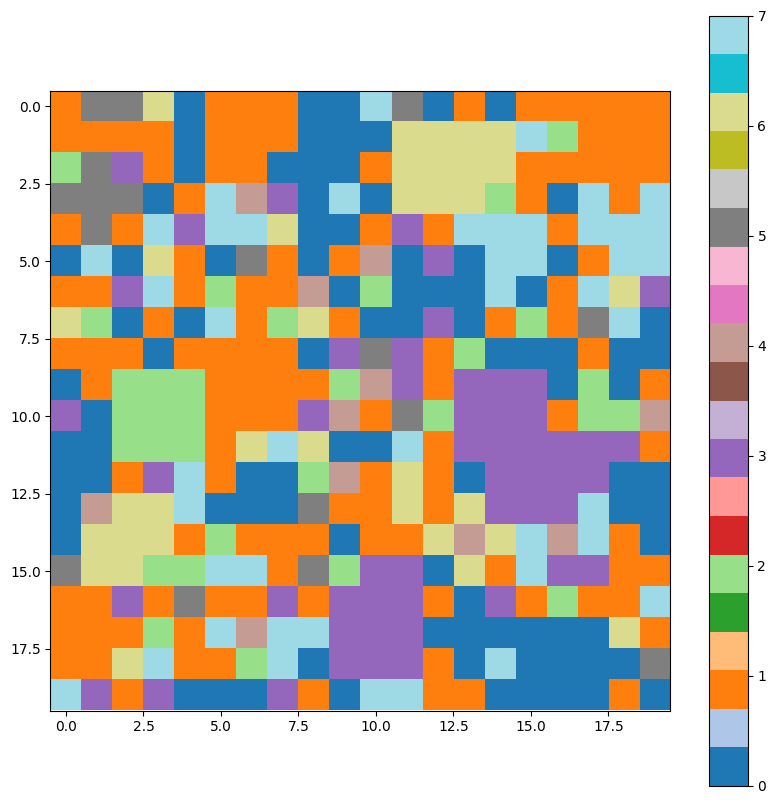

In [ ]:
cluster_map = labels.reshape(som_size, som_size)
plt.figure(figsize=(10, 10))
plt.imshow(cluster_map, cmap='tab20', interpolation='nearest')
plt.colorbar()

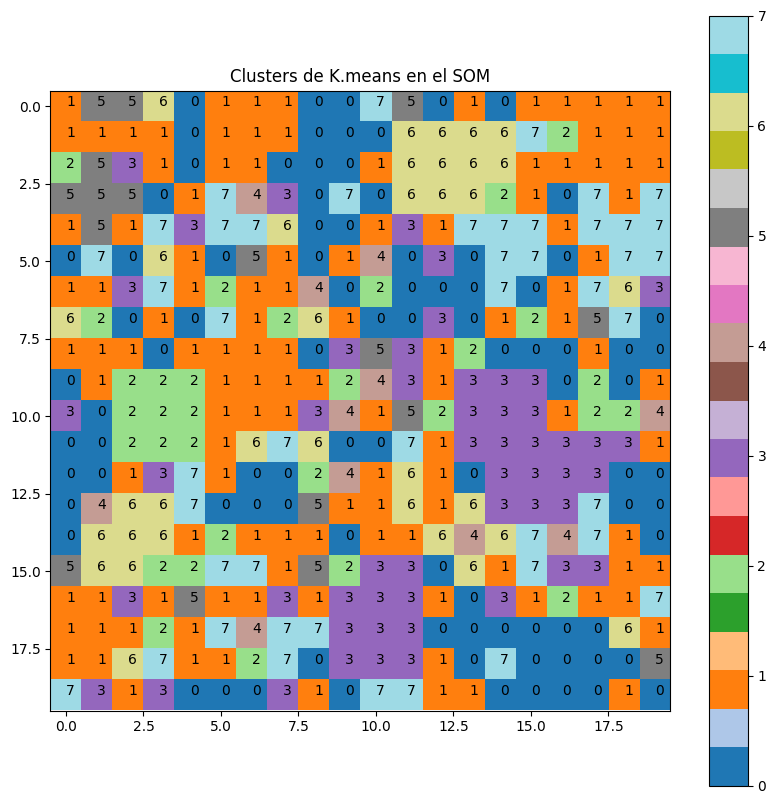

In [ ]:
cluster_map = labels.reshape(som_size, som_size)
plt.figure(figsize=(10, 10))
plt.imshow(cluster_map, cmap='tab20', interpolation='nearest')
plt.colorbar()

for i in range(som_size):
    for j in range(som_size):
        plt.text(j, i, str(cluster_map[i, j]), color='black')

plt.title('Clusters de K.means en el SOM')
plt.show()

#En el mapa de calor lo que se ve es representado por color, y con numeros, los conjuntos de datos o clusters que se han formado.


In [ ]:
# 8. Asignar cada dato original al cluster correspondiente del SOM
data_clusters = []
for datum in data_normalized:
    bmu = som.winner(datum)  # Encontrar la BMU para cada dato
    data_clusters.append(cluster_map[bmu])

data_clusters = np.array(data_clusters)


In [ ]:
#Funcion del grafico Radial

def radar_chart(data, clusters, features, num_clusters):
    labels = np.array(features)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # Completar el círculo

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Dibujar los clusters uno a uno
    for cluster in range(num_clusters):
        cluster_data = data[clusters == cluster]
        mean_values = cluster_data.mean(axis=0).tolist()
        mean_values += mean_values[:1]  # Completar el círculo

        ax.fill(angles, mean_values, alpha=0.25)
        ax.plot(angles, mean_values, label=f'Cluster {cluster}')

    ax.set_yticklabels([])  # Ocultar etiquetas del radio
    ax.set_xticks(angles[:-1])  # Poner etiquetas de las características
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

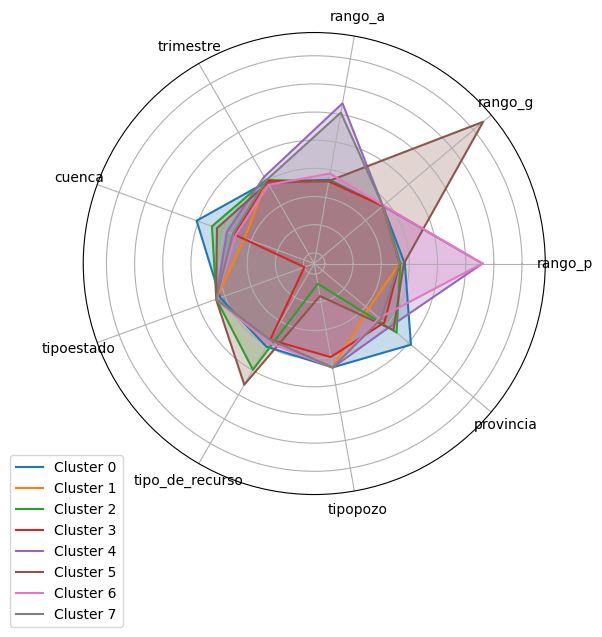

In [ ]:
# Definir las características que se usarán en el gráfico radial
features = ['rango_p', 'rango_g', 'rango_a', 'trimestre', 'cuenca', 'tipoestado', 'tipo_de_recurso','tipopozo','provincia']  # Modifica según tus columnas de interés
data_for_radar = data_selected[features].values  # Extrae los datos de las características seleccionadas

# Crear el gráfico radial
radar_chart(data_normalized, data_clusters, features, n_clusters)


In [ ]:
# prompt: quiero ver listado, en forma de tabla, los valores promedio en la escala original de cada atributo, de cada uno de los clusters que tengo listados

# Crear un DataFrame para mostrar la información de manera más organizada
cluster_stats = []
for cluster in range(n_clusters):
    cluster_data = data_normalized[data_clusters == cluster]
    mean = cluster_data.mean(axis=0)
    mean_original = scaler.inverse_transform([mean])[0]
    cluster_stats.append(mean_original)

cluster_stats_df = pd.DataFrame(cluster_stats, columns=data_selected.columns)
cluster_stats_df.index.name = 'Cluster'

cluster_stats_df

,rango_p,rango_g,rango_a,trimestre,cuenca,tipoestado,tipo_de_recurso,tipopozo,provincia
Cluster,,,,,,,,,
0,0.08,0.00,0.03,2.46,2.19,0.95,0.07,1.00,4.74
1,0.00,0.00,0.00,2.50,0.98,1.00,0.00,1.00,1.32
2,0.01,0.00,0.00,2.54,1.81,1.00,0.29,0.01,3.59
3,0.00,0.00,-0.00,2.49,1.24,0.00,-0.00,0.88,2.61
4,1.25,0.00,1.47,2.69,1.43,1.00,0.00,1.00,3.03
5,0.07,1.35,0.00,2.41,1.68,1.00,0.44,0.15,3.33
6,1.25,0.01,0.15,2.32,1.21,1.00,0.03,1.00,2.18
7,0.00,0.00,1.29,2.53,1.28,1.00,-0.00,1.00,2.31
